<a href="https://colab.research.google.com/github/joe94113/Machine-Learning/blob/main/%5B%E5%88%86%E9%A1%9E%5Diris.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
from sklearn.datasets import load_iris
iris = load_iris()
df = pd.DataFrame(iris["data"], columns= iris["feature_names"])
df["ans"] = iris['target']
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),ans
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [ ]:
# 將資料要分成兩份，一份學習一份測試
from sklearn.model_selection import train_test_split
# [90%題目, 10%題目, 90%答案, 10%答案]，隨機的
x_train, x_test, y_train, y_test = train_test_split(iris["data"], iris['target'], test_size=0.1)

In [ ]:
# 丟進演算法
from sklearn.tree import DecisionTreeClassifier # 決策樹分類器
clf = DecisionTreeClassifier(max_depth=2) # 前剪枝，設定最大深度為二
clf.fit(x_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=2, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [ ]:
from sklearn.metrics import accuracy_score # 分類準確率分數是指所有分類正確的百分比
pre = clf.predict(x_test)
print("預測:", list(pre))
print("正確:", list(y_test))
print("正確率:", accuracy_score(pre, y_test, normalize=True) # normalize可以調整成正確個數

預測: [2, 2, 2, 2, 1, 2, 0, 1, 1, 2, 2, 1, 2, 1, 0]
正確: [2, 2, 2, 2, 1, 2, 0, 1, 1, 2, 2, 1, 1, 1, 0]
正確率: 14


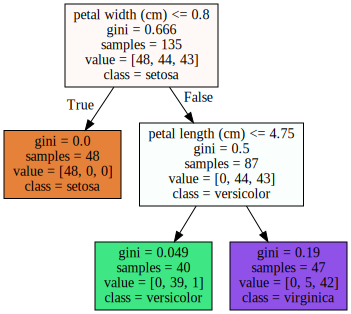

In [ ]:
import graphviz # 畫圖工具
from sklearn.tree import export_graphviz # 決策樹可視化
g = export_graphviz(clf, feature_names = iris['feature_names'], 
              class_names = iris["target_names"],
              filled = True)
graphviz.Source(g)
